## Coding Exercise #0704b

In [26]:
#Uncomment to force use of CPU.
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

#Suppress TF warnings
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### 1. Multi-layer neural network to recognize the handswritten digits:

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging
%matplotlib inline

#### 1.1. Download the MNIST data:

In [28]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)                                  # Set the verbosity lebel high so that most warnings are ignored.
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()   # Download the data.
type(mnist_train_images)                                                                            # Check the type.

numpy.ndarray

#### 1.2. Take a look at the dataset:

In [29]:
mnist_train_images = mnist_train_images.astype('float32') / 255
mnist_test_images = mnist_test_images.astype('float32') / 255

mnist_train_images = np.expand_dims(mnist_train_images, -1).reshape((mnist_train_images.shape[0],-1))
mnist_test_images = np.expand_dims(mnist_test_images, -1).reshape((mnist_test_images.shape[0],-1))

mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)          # one-hot encoding labels
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

Visualization.

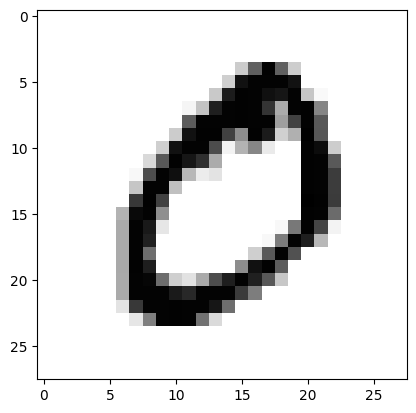

In [30]:
i_image= 1                                                      # Image index. You can change it at will.
a_single_image = mnist_train_images[i_image].reshape(28,28)     #  Reshape as a 2D array.
plt.imshow(1-a_single_image, cmap='gist_gray')                  #  Display as grayscale image.
plt.show()

In [31]:
# Check for the minimum and maximum pixel value.
# The data has been min-max-scaled already!
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 0.0
MAX : 1.0


#### 1.3. Do the necessary definitions:

In [32]:
batch_size = 30                                # Size of each (mini) batch.
n_epochs  = 20000                              # Number of epochs.
learn_rate = 0.01

In [33]:
# We are building a multi-layer neural network. Thus, several sets of (b,W) required.
# Parameters that connect the input layer with the first hidden layer.
W1 = tf.Variable(tf.random.normal([784,30],0,1))   # Input = 784 nodes, Output = 30 nodes.
b1 = tf.Variable(tf.random.normal([30],0,1))
# Parameters that connect the first hidden layer with the second hidden layer.
W2 = tf.Variable(tf.random.normal([30,15],0,1))    # Input = 30 nodes, Output = 15 nodes (the same as the number of output nodes at the previous layer).
b2 = tf.Variable(tf.random.normal([15],0,1))
# Parameters that connect the second hidden layer with the output layer.
W3 = tf.Variable(tf.random.normal([15,10],0,1))    # Input = 15 nodes, Output = 10 nodes (the same as the number of output nodes at the previous layer).
b3 = tf.Variable(tf.random.normal([10],0,1))

In [34]:
# A multi-layer model.
# As before, the Softmax activation at the output layer is optional.
def model(X):
    hidden1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)
    y_model =  tf.matmul(hidden2, W3) + b3
    return y_model

In [35]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_true, y_pred))  # loss = Cross Entropy.

In [36]:
optimizer = tf.optimizers.Adam(learning_rate=learn_rate)      # A better optimizer.
# optimizer = tf.optimizers.SGD(learning_rate = learn_rate)        # A basic optimizer.

#### 1.4. Training and Testing:

In [37]:
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss_value = loss_fn(y, y_pred)
        gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

# To replicate functionalities of tensorflow v1.* next_batch():
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_labels))  # join together images and labels
train_dataset = train_dataset.repeat().batch(batch_size)                                      # yield batches that straddle epoch boundaries
# train_dataset = train_dataset.batch(batch_size)                                             # if clear epoch separation is needed

# Training.
for i in range(n_epochs):
    batch_X, batch_y = next(iter(train_dataset))                                # Get a batch.
    train_step(batch_X, batch_y)
    if (i + 1) % 2000 == 0:
        print("Step : {}".format(i + 1))                                        # Print the step number at every multiple of 2000.

# Testing.
correct_predictions = tf.equal(tf.argmax(mnist_test_labels, axis=1), tf.argmax(model(mnist_test_images), axis=1))  # In argmax(), axis=1 means horizontal direction.
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))                            # Recast the Boolean as float32 first. Then calculate the mean.
accuracy_value = accuracy.numpy()

Step : 2000
Step : 4000
Step : 6000
Step : 8000
Step : 10000
Step : 12000
Step : 14000
Step : 16000
Step : 18000
Step : 20000


Print the testing result.

In [38]:
print("Accuracy = {:5.3f}".format(accuracy_value))

Accuracy = 0.441


### This is the equivalent version using keras

In [39]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import logging

In [40]:
# Set the verbosity level of TensorFlow to ignore most warnings
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [41]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to match the shape expected by the neural network
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# One-hot encode the labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [43]:
# Define batch size and number of epochs
batch_size = 30
n_epochs = 20
learn_rate = 0.01

In [44]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(30, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(15, activation='sigmoid'),
    keras.layers.Dense(10)  # No activation for the output layer
])

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=learn_rate)

In [46]:
# Compile the model
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=len(x_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [25]:
# Train the model
history = model.fit(train_dataset, epochs=n_epochs, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3512 - accuracy: 0.9033
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1926 - accuracy: 0.9429
Epoch 3/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1668 - accuracy: 0.9505
Epoch 4/20
2000/2000 [==============================] - 13s 6ms/step - loss: 0.1550 - accuracy: 0.9538
Epoch 5/20
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1409 - accuracy: 0.9581
Epoch 6/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1397 - accuracy: 0.9582
Epoch 7/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1289 - accuracy: 0.9605
Epoch 8/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1264 - accuracy: 0.9620
Epoch 9/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9640
Epoch 10/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1